In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import statsmodels
from scipy import stats
from scipy.stats import levene
import scipy.stats
import math
import random
import statistics
import scipy.stats as sp
from sklearn import linear_model
import seaborn as sns

!pip install scikit_posthocs
!pip install researchpy
import researchpy as rp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**EDA:**

In [152]:
# Read data
url = "https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv"
dataset = pd.read_csv(url)
dataset.head()


,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0000,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0000,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0000,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0000,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0000,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [153]:
# Number of rows
print(dataset.shape[0])
dataset.info()



65276
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65276 entries, 0 to 65275
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      65276 non-null  int64  
 1   Arrest_Month                     65276 non-null  object 
 2   EventID                          65276 non-null  int64  
 3   ArrestID                         64807 non-null  float64
 4   PersonID                         65276 non-null  int64  
 5   Perceived_Race                   65272 non-null  object 
 6   Sex                              65276 non-null  object 
 7   Age_group__at_arrest_            65252 non-null  object 
 8   Youth_at_arrest__under_18_years  65276 non-null  object 
 9   ArrestLocDiv                     65276 non-null  object 
 10  StripSearch                      65276 non-null  int64  
 11  Booked                           65276 non-null  int64  
 12  Occurrence_C

In [154]:
df = dataset.dropna(subset=['StripSearch']) # drop missing 
print(df['StripSearch'].value_counts())

0    57475
1     7801
Name: StripSearch, dtype: int64


In [155]:
!pip install chart-studio
from chart_studio import plotly
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [156]:
df = df.dropna(subset=['Perceived_Race'])
df = df.dropna(subset=['StripSearch'])
df = df.dropna(subset=['Age_group__at_arrest_'])
df = df.dropna(subset=['Sex'])
df = df.dropna(subset=['Booked'])

df['Age_group__at_arrest_'].value_counts()
df.info()

df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace(['Aged 17 years and younger'], 'Aged 17 years and under')
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace(['Aged 65 and older'], 'Aged 65 years and older')
print(df['Age_group__at_arrest_'].unique())
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace(['Aged 17 years and under'], 0)
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace(['Aged 18 to 24 years'], 1)
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace(['Aged 25 to 34 years'], 2)
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace(['Aged 35 to 44 years'], 3)
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace(['Aged 45 to 54 years'], 4)
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace(['Aged 55 to 64 years'], 5)
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace(['Aged 65 years and older'], 6)
df = df.drop(df[df['Perceived_Race'] == 'Unknown or Legacy'].index)
df = df.drop(df[df['Sex'] == 'U'].index)

print(df['Age_group__at_arrest_'].unique())
print(df['Age_group__at_arrest_'].value_counts())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 65248 entries, 0 to 65275
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      65248 non-null  int64  
 1   Arrest_Month                     65248 non-null  object 
 2   EventID                          65248 non-null  int64  
 3   ArrestID                         64780 non-null  float64
 4   PersonID                         65248 non-null  int64  
 5   Perceived_Race                   65248 non-null  object 
 6   Sex                              65248 non-null  object 
 7   Age_group__at_arrest_            65248 non-null  object 
 8   Youth_at_arrest__under_18_years  65248 non-null  object 
 9   ArrestLocDiv                     65248 non-null  object 
 10  StripSearch                      65248 non-null  int64  
 11  Booked                           65248 non-null  int64  
 12  Occurrence_Categor

In [158]:
new_df = df.drop(['Arrest_Year', 'Arrest_Month', 'Youth_at_arrest__under_18_years','EventID', 'ArrestID', 'PersonID', 'ArrestLocDiv', 'Occurrence_Category', 'Actions_at_arrest___Concealed_i', 'Actions_at_arrest___Combative__', 'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d', 'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o', 'Actions_at_arrest___Cooperative', 'ObjectId'], axis=1)

group = new_df.groupby('Perceived_Race')
new_df.info()
list(group)
print(group.mean())
group.std()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60187 entries, 0 to 65275
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Perceived_Race                60187 non-null  object 
 1   Sex                           60187 non-null  object 
 2   Age_group__at_arrest_         60187 non-null  int64  
 3   StripSearch                   60187 non-null  int64  
 4   Booked                        60187 non-null  int64  
 5   SearchReason_CauseInjury      7264 non-null   float64
 6   SearchReason_AssistEscape     7264 non-null   float64
 7   SearchReason_PossessWeapons   7264 non-null   float64
 8   SearchReason_PossessEvidence  7264 non-null   float64
 9   ItemsFound                    7264 non-null   float64
dtypes: float64(5), int64(3), object(2)
memory usage: 5.1+ MB
                      Age_group__at_arrest_  StripSearch  Booked  \
Perceived_Race                                       

<ipython-input-158-8e56eb397506>:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-158-8e56eb397506>:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Age_group__at_arrest_,StripSearch,Booked,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound
Perceived_Race,,,,,,,,
Black,1.2460,0.3459,0.4973,0.4449,0.4758,0.5000,0.4973,0.4847
East/Southeast Asian,1.4277,0.2671,0.4994,0.4206,0.4460,0.4916,0.4946,0.4754
Indigenous,1.0878,0.3652,0.4971,0.4097,0.4875,0.5003,0.4851,0.4851
Latino,1.2385,0.2630,0.4980,0.4255,0.4850,0.4949,0.4935,0.4807
Middle-Eastern,1.3304,0.2559,0.5001,0.4365,0.4623,0.4995,0.4978,0.4846
South Asian,1.3512,0.2571,0.5000,0.3740,0.4537,0.4925,0.4946,0.4767
White,1.3195,0.3349,0.4998,0.4070,0.4768,0.4937,0.4909,0.4848


In [159]:
group1 = new_df.groupby('Age_group__at_arrest_')
list(group1)
group1.mean()

<ipython-input-159-d46cc24df7b6>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,StripSearch,Booked,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound
Age_group__at_arrest_,,,,,,,
0,0.0917,0.4042,0.7761,0.4131,0.6371,0.5174,0.3784
1,0.1356,0.5252,0.7398,0.3502,0.5133,0.4803,0.4161
2,0.1327,0.5483,0.7786,0.3467,0.4541,0.4065,0.3342
3,0.1308,0.5415,0.7764,0.3323,0.4126,0.4040,0.3506
4,0.1015,0.5185,0.7477,0.3322,0.4202,0.3709,0.4378
5,0.0819,0.4632,0.7919,0.3382,0.4480,0.4364,0.4769
6,0.0272,0.3812,0.7879,0.1818,0.4545,0.5455,0.4848


In [160]:
group1.std()

<ipython-input-160-542cd0d2d680>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,StripSearch,Booked,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound
Age_group__at_arrest_,,,,,,,
0,0.2886,0.4908,0.4177,0.4933,0.4818,0.5007,0.4859
1,0.3424,0.4994,0.4389,0.4772,0.5000,0.4998,0.4931
2,0.3393,0.4977,0.4153,0.4760,0.4980,0.4913,0.4718
3,0.3372,0.4983,0.4167,0.4712,0.4924,0.4908,0.4773
4,0.3020,0.4997,0.4346,0.4713,0.4939,0.4833,0.4964
5,0.2742,0.4987,0.4065,0.4738,0.4980,0.4967,0.5002
6,0.1628,0.4859,0.4151,0.3917,0.5056,0.5056,0.5075


In [161]:
group2 = new_df.groupby('Sex')
list(group2)
group2.mean()

<ipython-input-161-c6d6b93cc262>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Age_group__at_arrest_,StripSearch,Booked,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound
Sex,,,,,,,,
F,2.4471,0.1016,0.4384,0.7700,0.3235,0.3833,0.3943,0.4069
M,2.6042,0.1253,0.5432,0.7680,0.3467,0.4693,0.4254,0.3675


In [162]:
group2.std()

<ipython-input-162-7f1622a226e8>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Age_group__at_arrest_,StripSearch,Booked,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound
Sex,,,,,,,,
F,1.3084,0.3021,0.4962,0.4210,0.4680,0.4864,0.4889,0.4915
M,1.3353,0.3310,0.4981,0.4222,0.4760,0.4991,0.4944,0.4822


In [163]:
group3 = new_df.groupby('Perceived_Race')
list(group3)
group3.mean()

<ipython-input-163-76a41fb9cc54>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Age_group__at_arrest_,StripSearch,Booked,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound
Perceived_Race,,,,,,,,
Black,2.1796,0.1389,0.5520,0.7284,0.3459,0.5078,0.4470,0.3767
East/Southeast Asian,2.6457,0.0773,0.4746,0.7713,0.2727,0.4047,0.4223,0.3431
Indigenous,2.6165,0.1584,0.5554,0.7876,0.3856,0.4771,0.3758,0.3758
Latino,2.4375,0.0747,0.5461,0.7652,0.3712,0.5833,0.4091,0.3561
Middle-Eastern,2.3491,0.0704,0.5042,0.7456,0.3070,0.4605,0.4430,0.3728
South Asian,2.5632,0.0711,0.4918,0.8327,0.2879,0.4086,0.4202,0.3463
White,2.8447,0.1287,0.5145,0.7905,0.3491,0.4206,0.4047,0.3775


<Axes: xlabel='Perceived_Race', ylabel='Count'>

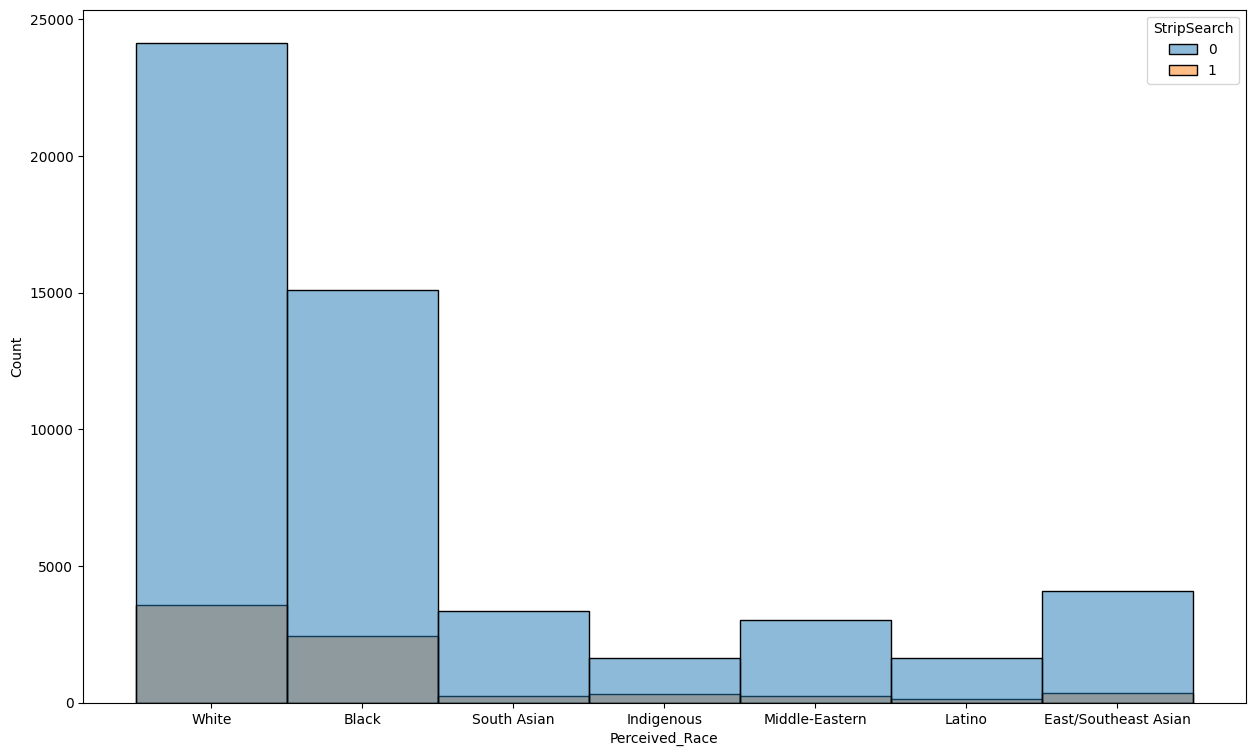

In [164]:
plt.figure(figsize=(15, 9))
sns.histplot(x="Perceived_Race", hue="StripSearch", data=new_df)

<Axes: xlabel='Perceived_Race', ylabel='StripSearch'>

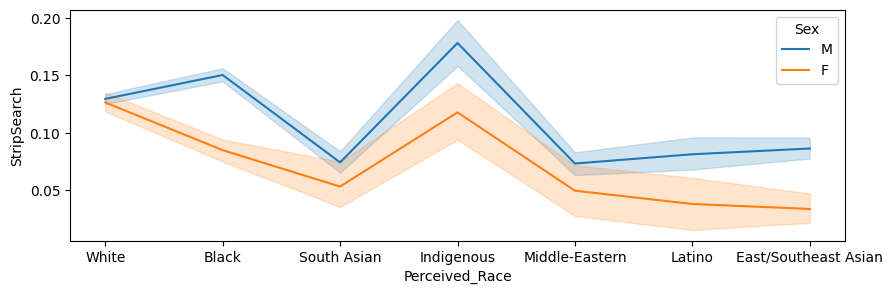

In [165]:
plt.figure(figsize=(10, 3))
sns.lineplot(data=new_df, x="Perceived_Race", y="StripSearch", hue="Sex")

[Text(0.5, 1.0, 'Strip Search Rate vs Perceived Race')]

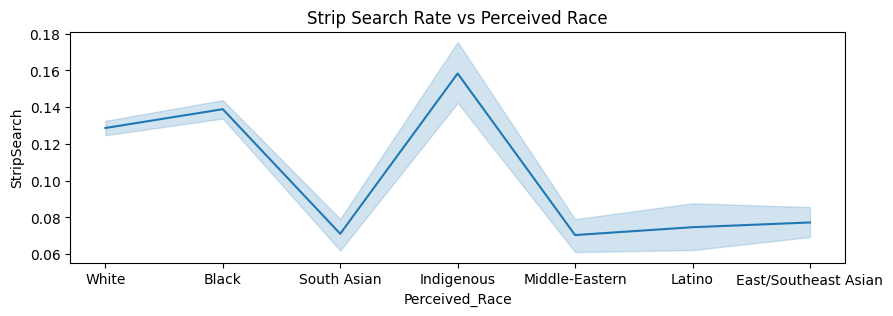

In [166]:
plt.figure(figsize=(10, 3))
sns.lineplot(data=new_df, x="Perceived_Race", y="StripSearch").set(title='Strip Search Rate vs Perceived Race')

[Text(0.5, 1.0, 'Strip Search Rate vs Age Group at Arrest')]

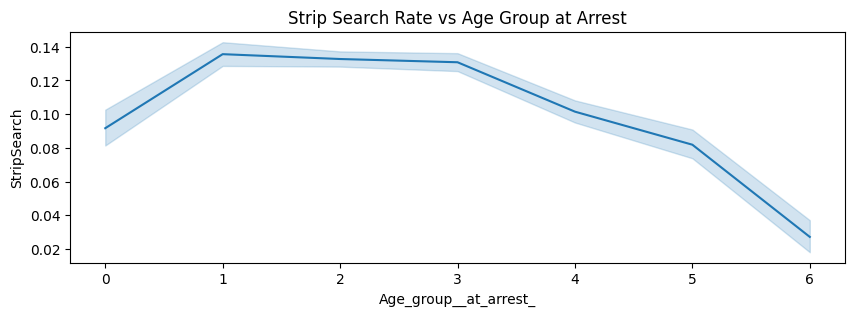

In [167]:
plt.figure(figsize=(10, 3))
sns.lineplot(data=new_df, x="Age_group__at_arrest_", y="StripSearch").set(title='Strip Search Rate vs Age Group at Arrest')

[Text(0.5, 1.0, 'Strip Search Rate vs Sex')]

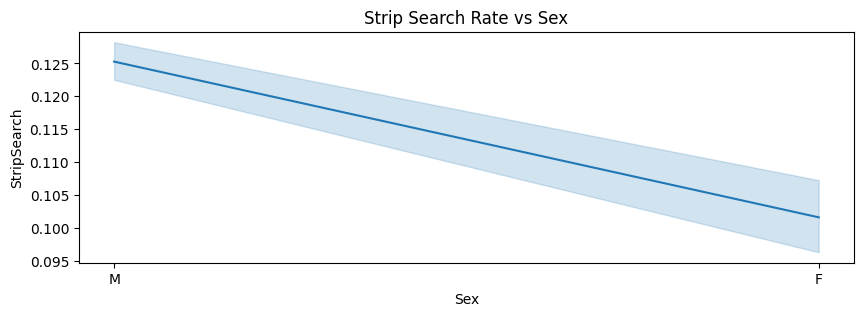

In [168]:
plt.figure(figsize=(10, 3))
sns.lineplot(data=new_df, x="Sex", y="StripSearch").set(title='Strip Search Rate vs Sex')

[Text(0.5, 1.0, 'Perceived Race')]

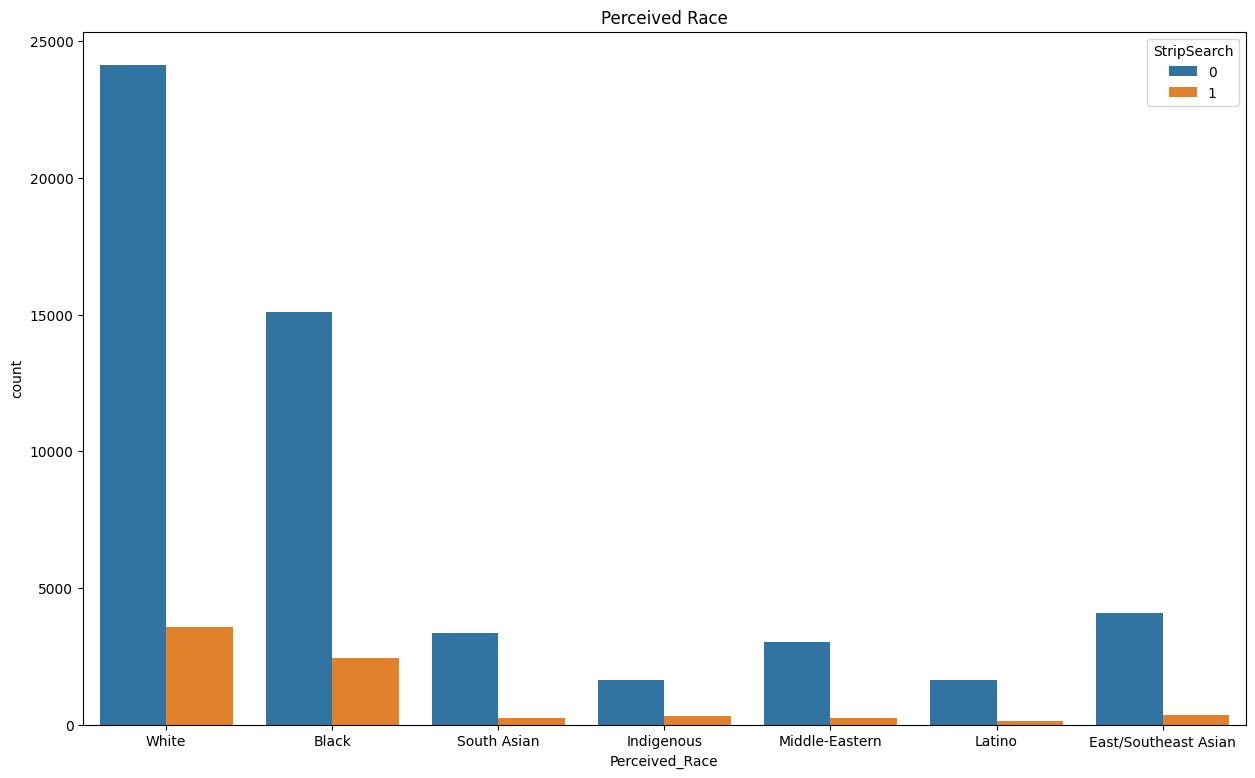

In [169]:
plt.figure(figsize=(15, 9))
sns.countplot(data=new_df, x="Perceived_Race", hue="StripSearch").set(title='Perceived Race')

<Axes: xlabel='Sex', ylabel='Count'>

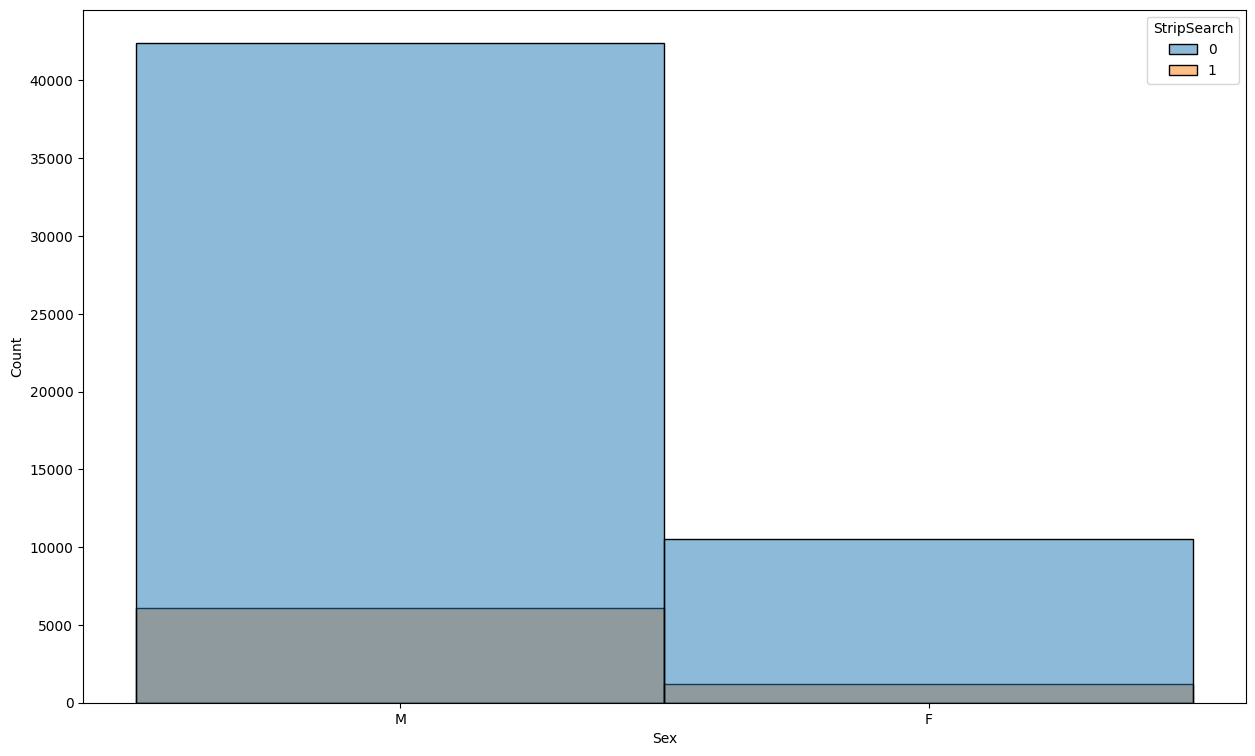

In [170]:
plt.figure(figsize=(15, 9))
sns.histplot(x="Sex", hue="StripSearch", data=new_df)


<Axes: xlabel='Sex', ylabel='count'>

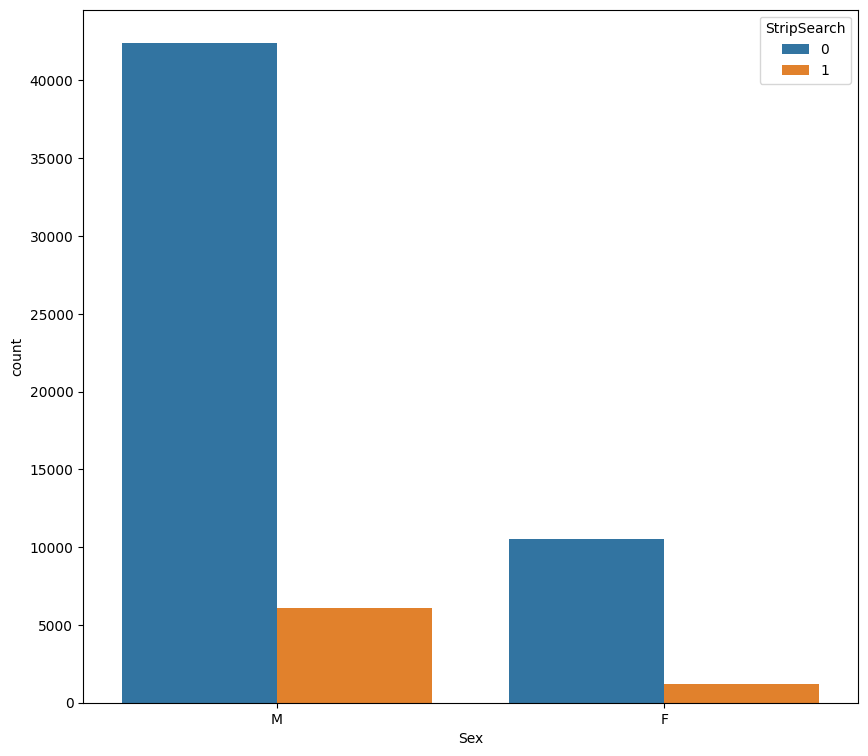

In [171]:
plt.figure(figsize=(10, 9))
sns.countplot(data=new_df, x="Sex", hue="StripSearch")

<Axes: xlabel='Age_group__at_arrest_', ylabel='Count'>

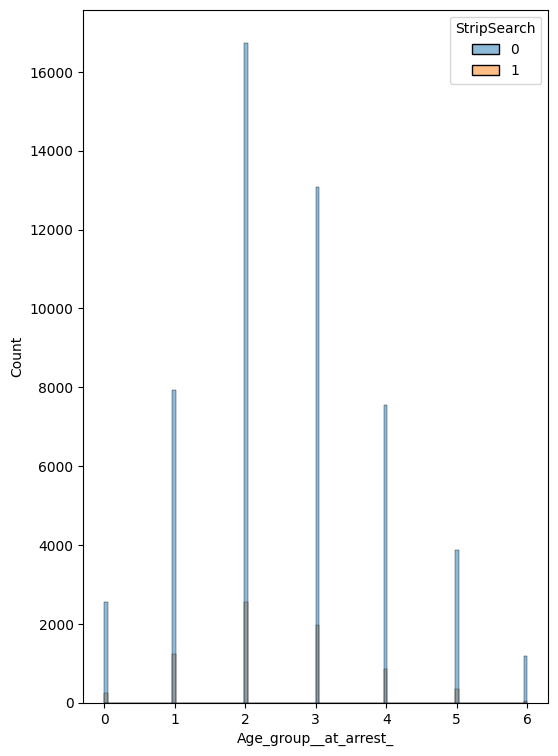

In [172]:
plt.figure(figsize=(6, 9))
sns.histplot(x="Age_group__at_arrest_", hue="StripSearch", data=new_df)


<Axes: xlabel='Perceived_Race', ylabel='StripSearch'>

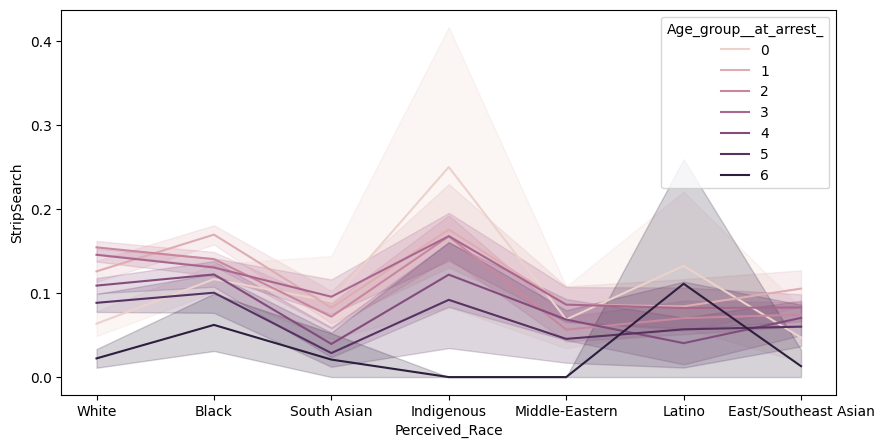

In [173]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=new_df, x="Perceived_Race", y="StripSearch", hue="Age_group__at_arrest_")

<Axes: xlabel='Age_group__at_arrest_', ylabel='count'>

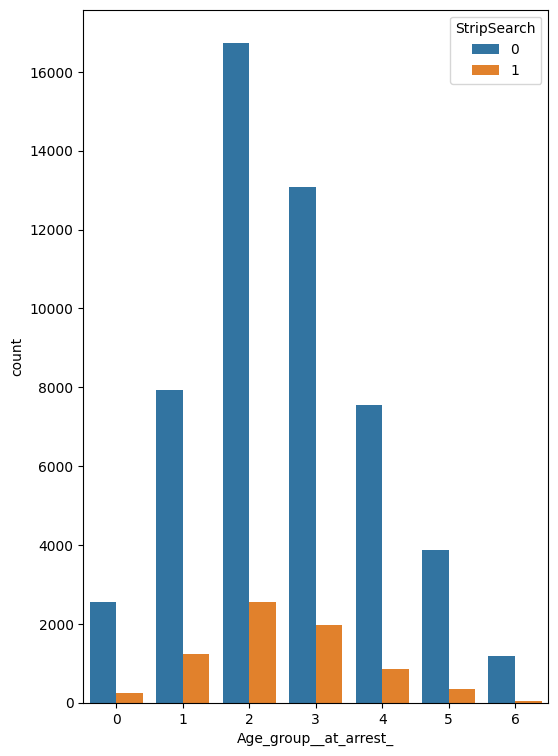

In [174]:
plt.figure(figsize=(6, 9))
sns.countplot(data=new_df, x="Age_group__at_arrest_", hue="StripSearch")

In [ ]:
#from statsmodels.graphics.factorplots import interaction_plot
#rq_2_interaction = interaction_plot(new_df['Age_group__at_arrest_'], new_df['Perceived_Race'], new_df['StripSearch'], colors=['red','blue'], markers=['D','^'], ms=10)

[Text(0.5, 1.0, 'Booked, percieved race, strip search')]

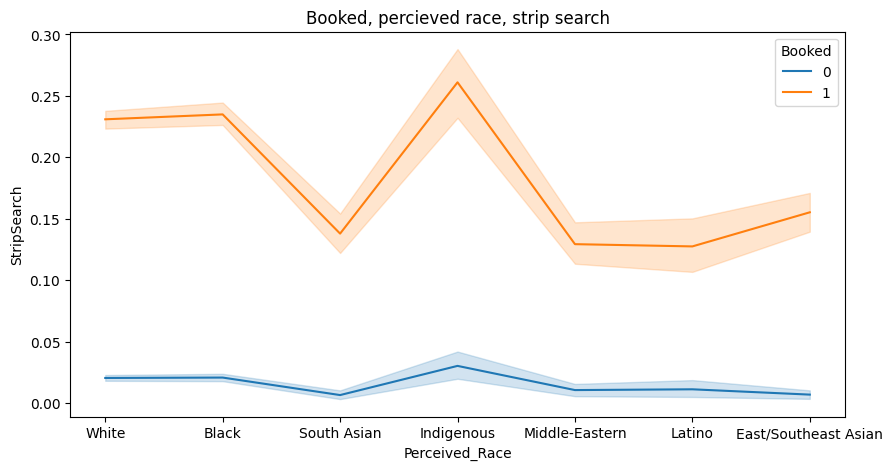

In [175]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=new_df, x="Perceived_Race", y="StripSearch", hue="Booked").set(title='Booked, percieved race, strip search')

[Text(0.5, 1.0, 'Booked, age, strip search')]

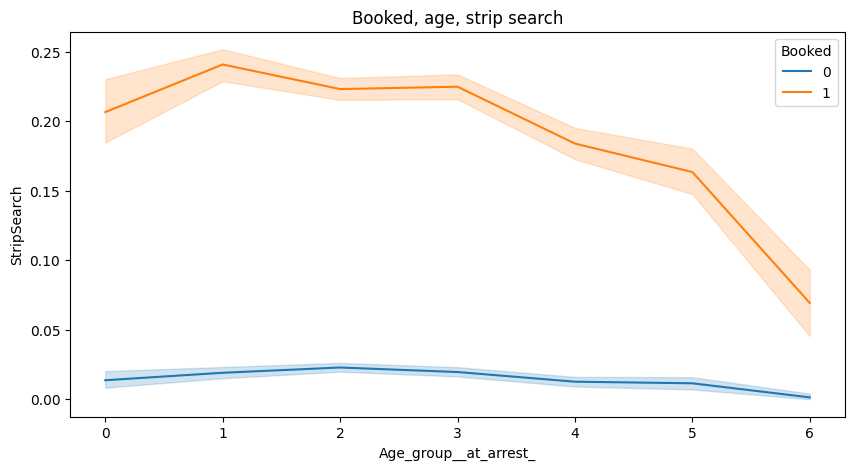

In [176]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=new_df, x="Age_group__at_arrest_", y="StripSearch", hue="Booked").set(title='Booked, age, strip search')

[Text(0.5, 1.0, 'Booked, gender, strip search')]

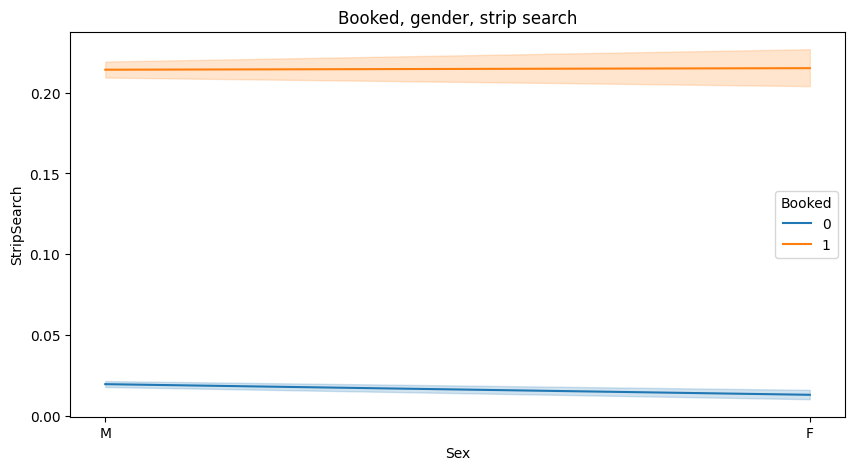

In [177]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=new_df, x="Sex", y="StripSearch", hue="Booked").set(title='Booked, gender, strip search')

[Text(0.5, 1.0, 'Booked, strip search')]

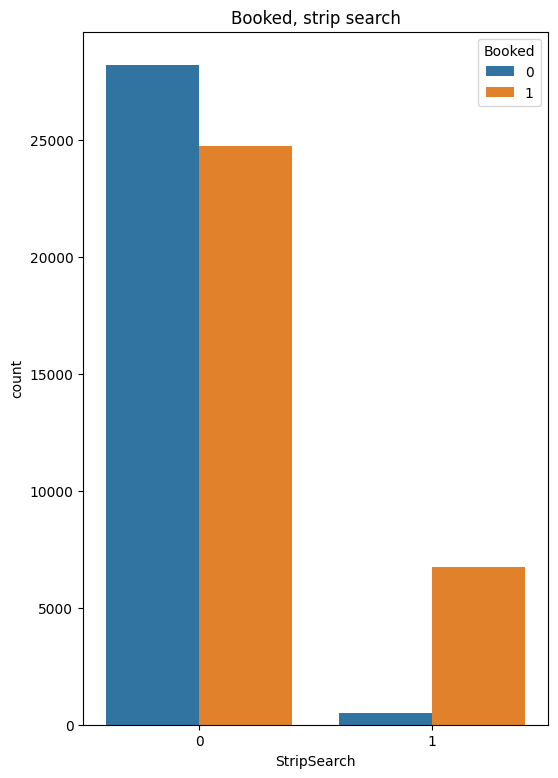

In [178]:
plt.figure(figsize=(6, 9))
sns.countplot(data=new_df, x="StripSearch", hue="Booked").set(title='Booked, strip search')

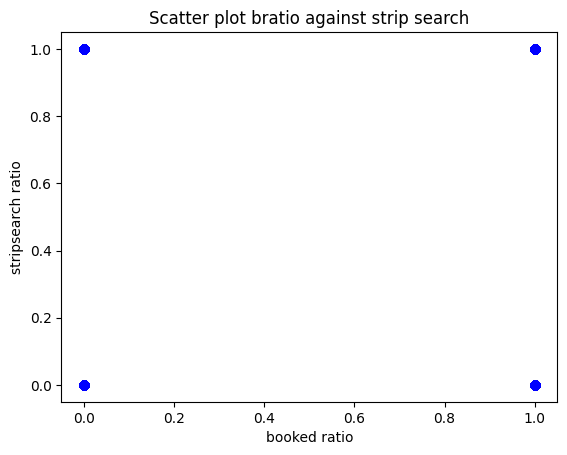

In [179]:
plt.scatter(new_df['Booked'], new_df['StripSearch'], color='blue')

plt.xlabel("booked ratio")
plt.ylabel("stripsearch ratio")
plt.title("Scatter plot bratio against strip search")
plt.show()

[Text(0.5, 1.0, 'Booked, strip search')]

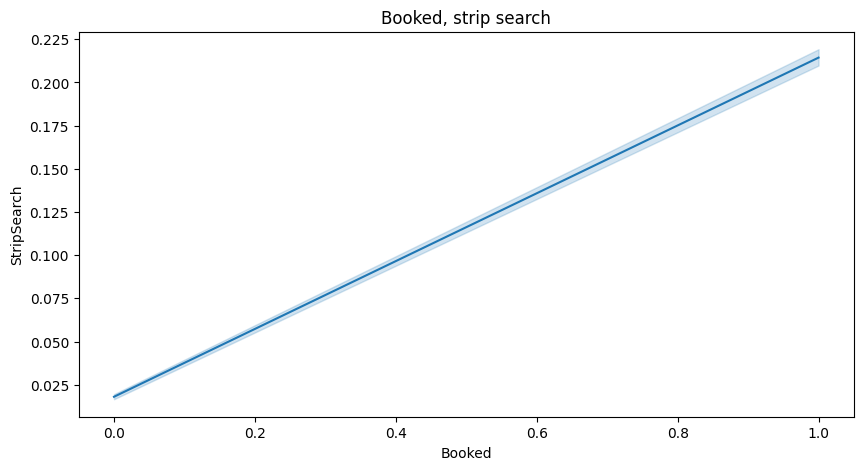

In [180]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=new_df, x="Booked", y="StripSearch").set(title='Booked, strip search')

<Axes: xlabel='ItemsFound', ylabel='count'>

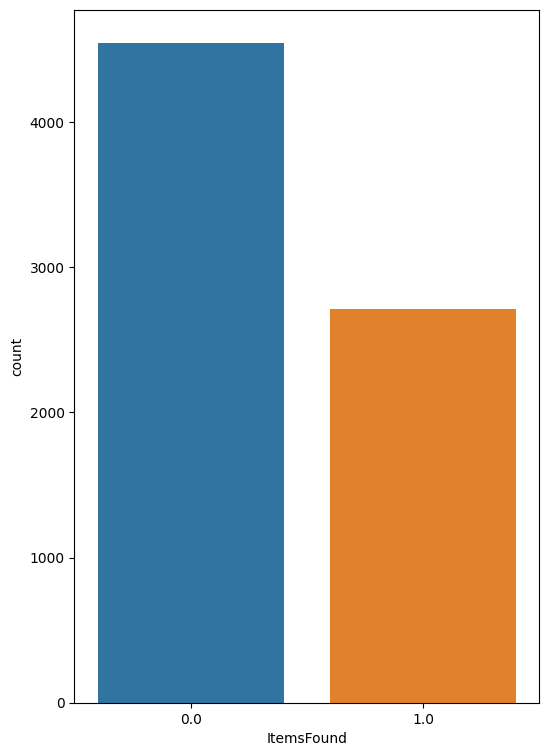

In [181]:
plt.figure(figsize=(6, 9))
sns.countplot(data=new_df, x="ItemsFound")

<Axes: xlabel='SearchReason_CauseInjury', ylabel='count'>

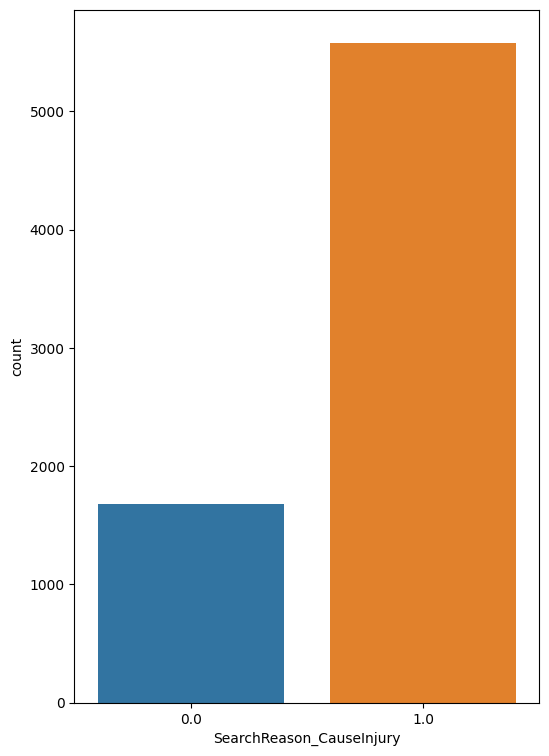

In [182]:
plt.figure(figsize=(6, 9))
sns.countplot(data=new_df, x="SearchReason_CauseInjury")

<Axes: xlabel='SearchReason_AssistEscape', ylabel='count'>

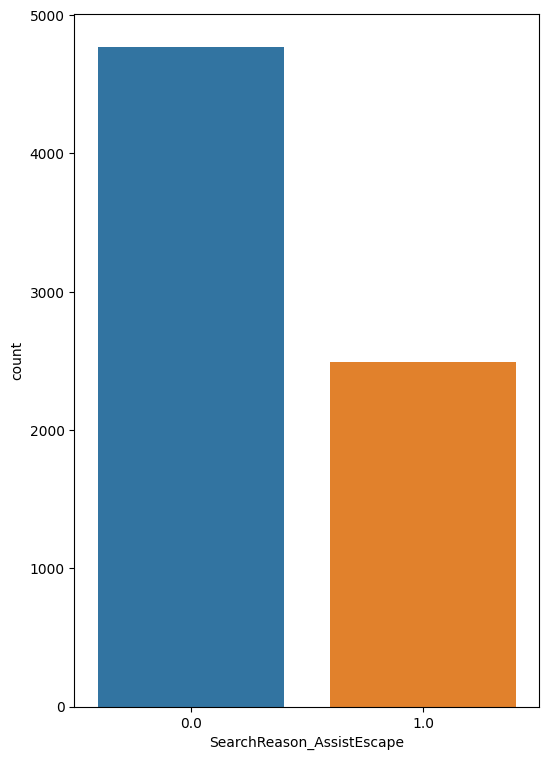

In [183]:
plt.figure(figsize=(6, 9))
sns.countplot(data=new_df, x="SearchReason_AssistEscape")

<Axes: xlabel='ItemsFound', ylabel='count'>

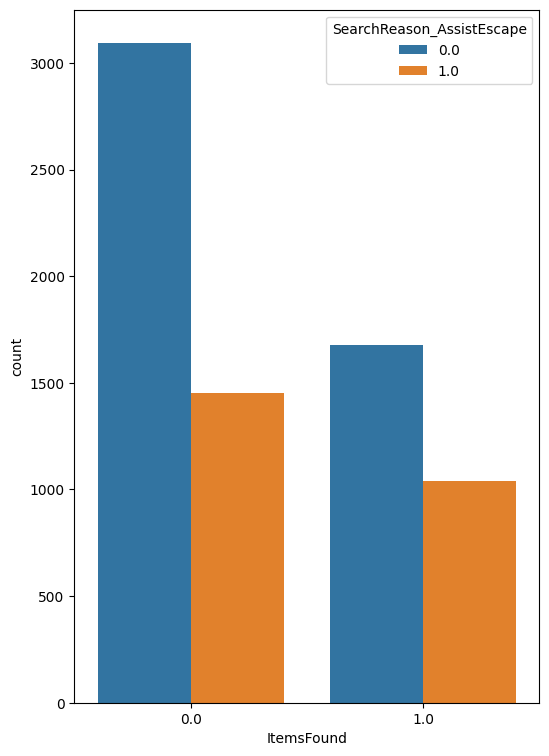

In [184]:
plt.figure(figsize=(6, 9))
sns.countplot(data=new_df, x="ItemsFound", hue="SearchReason_AssistEscape")

<Axes: xlabel='SearchReason_PossessWeapons', ylabel='count'>

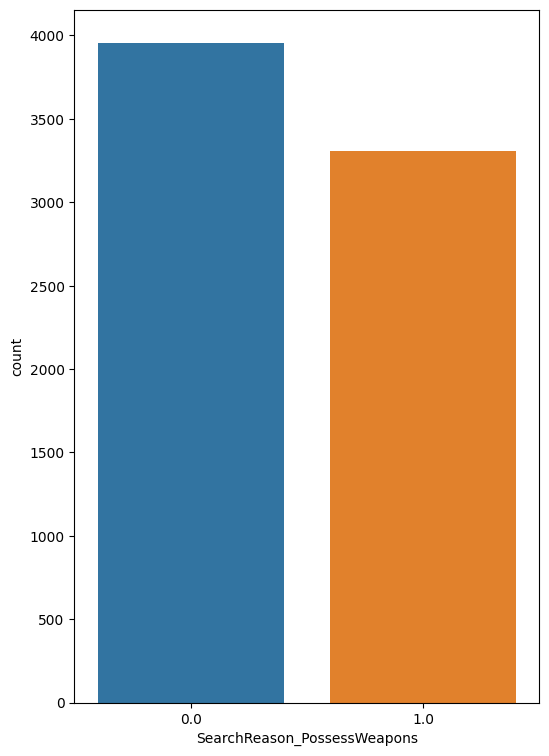

In [ ]:
plt.figure(figsize=(6, 9))
sns.countplot(data=new_df, x="SearchReason_PossessWeapons")

<Axes: xlabel='SearchReason_PossessEvidence', ylabel='count'>

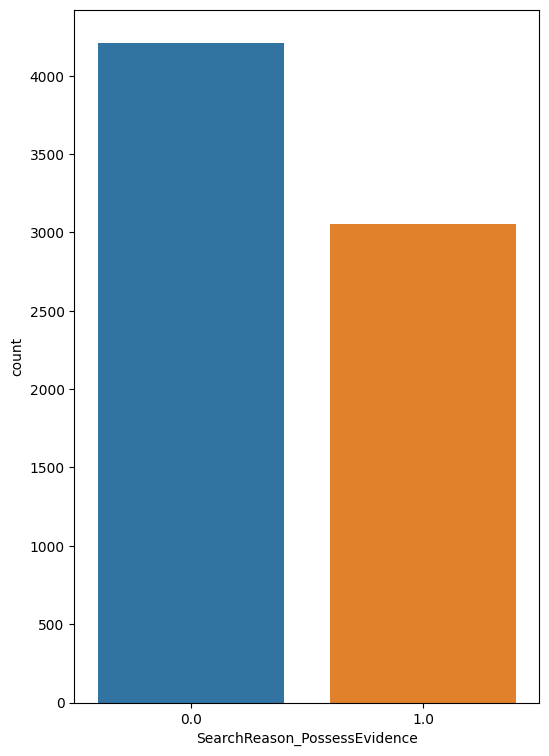

In [ ]:
plt.figure(figsize=(6, 9))
sns.countplot(data=new_df, x="SearchReason_PossessEvidence")

<Axes: xlabel='ItemsFound', ylabel='count'>

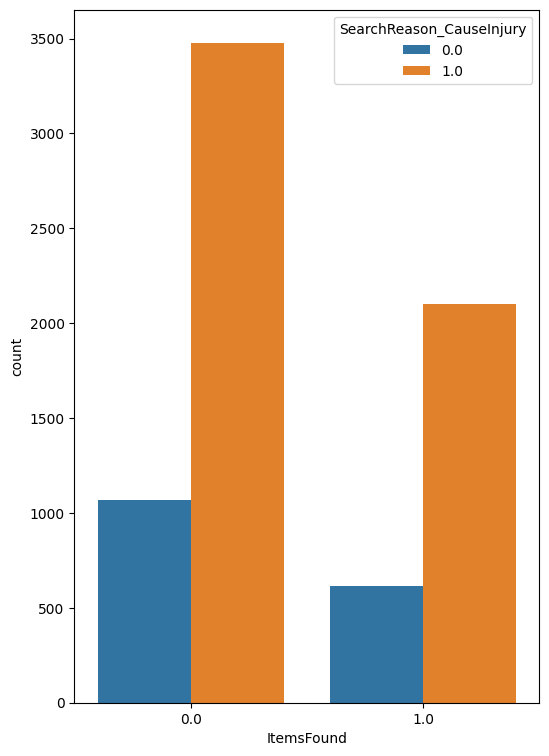

In [ ]:
plt.figure(figsize=(6, 9))
sns.countplot(data=new_df, x="ItemsFound", hue="SearchReason_CauseInjury")

<Axes: xlabel='ItemsFound', ylabel='count'>

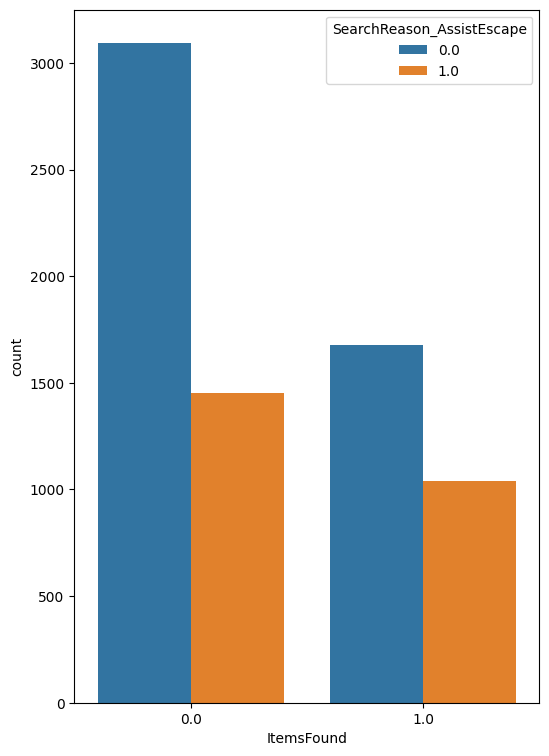

In [ ]:
plt.figure(figsize=(6, 9))
sns.countplot(data=new_df, x="ItemsFound", hue="SearchReason_AssistEscape")

<Axes: xlabel='ItemsFound', ylabel='count'>

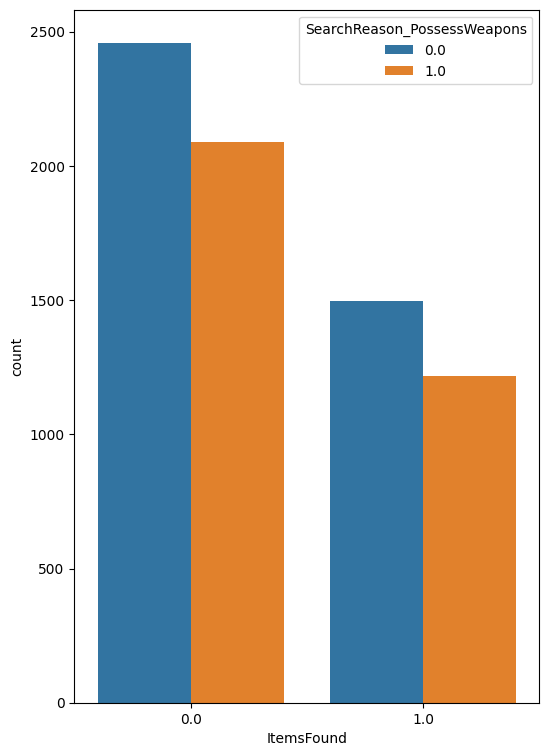

In [ ]:
plt.figure(figsize=(6, 9))
sns.countplot(data=new_df, x="ItemsFound", hue="SearchReason_PossessWeapons")

<Axes: xlabel='ItemsFound', ylabel='count'>

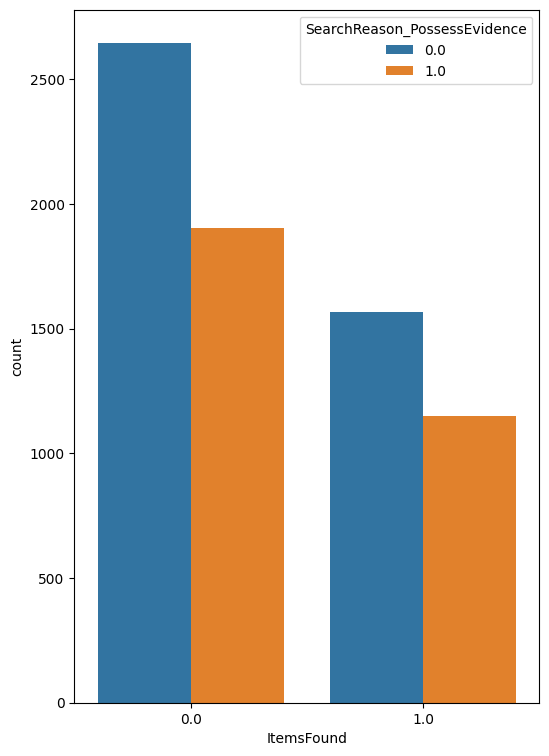

In [ ]:
plt.figure(figsize=(6, 9))
sns.countplot(data=new_df, x="ItemsFound", hue="SearchReason_PossessEvidence")

In [ ]:
#plt.figure(figsize=(15, 9))
#df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace([17.0], "Younger than 30")
#df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace([21.0], "Younger than 30")
#df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace([29.5], "Younger than 30")
#df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace([39.5], "Older than 30")
#df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace([49.5], "Older than 30")
#df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace([59.5], "Older than 30")
#df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].replace([65.0], "Older than 30")
#sns.histplot(x="Age_group__at_arrest_", hue="StripSearch", data=df)

In [185]:
print(new_df['Perceived_Race'].unique())
PR_old = new_df[new_df['Perceived_Race']=='White']
PR_new = new_df[new_df['Perceived_Race']=='Black']
old_search = PR_old['StripSearch']
new_search = PR_new['StripSearch']

#conduct ttest

print('Ttest results for StripSearch:',stats.ttest_ind(old_search, new_search, equal_var=False)) #p value is significant

['White' 'Black' 'South Asian' 'Indigenous' 'Middle-Eastern' 'Latino'
 'East/Southeast Asian']
Ttest results for StripSearch: Ttest_indResult(statistic=-3.1059472505339207, pvalue=0.0018981642955491205)


In [186]:
import statsmodels.stats.api as sms
def welch_dof(x, y): 
    '''
    Takes in final grades for binary features
    Returns degrees of freedom 
    '''
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
    return dof
print('Mean StripSearch rates between white and black:',old_search.mean(), new_search.mean())
print('Standard deviation between white and black:',old_search.std(), new_search.std())

cm = sms.CompareMeans(sms.DescrStatsW(old_search), sms.DescrStatsW(new_search))
print('Confidence interval for StripSearch rates between white and black:',cm.tconfint_diff(usevar='unequal'))
print('DOF for StripSearch rates between white and black:', welch_dof(old_search, new_search))

Mean StripSearch rates between white and black: 0.12869929262306914 0.13894280168969061
Standard deviation between white and black: 0.33487285930918165 0.3458967032997222
Confidence interval for StripSearch rates between white and black: (-0.01670774545880803, -0.003779272674434909)
DOF for StripSearch rates between white and black: 36357.06139056397


In [187]:
PR_old = new_df[new_df['Perceived_Race']=='White']
PR_new = new_df[new_df['Perceived_Race']=='South Asian']
old_search = PR_old['StripSearch']
new_search = PR_new['StripSearch']

#conduct ttest
print('Ttest results for StripSearch:',stats.ttest_ind(old_search, new_search, equal_var=False)) #p value is significant

Ttest results for StripSearch: Ttest_indResult(statistic=12.179729220443274, pvalue=1.1084947033789661e-33)


In [188]:
print('Mean StripSearch rates between white and South Asian:',old_search.mean(), new_search.mean())
print('Standard deviation between white and South Asian:',old_search.std(), new_search.std())
cm = sms.CompareMeans(sms.DescrStatsW(old_search), sms.DescrStatsW(new_search))
print('Confidence interval for StripSearch rates between white and South Asian:',cm.tconfint_diff(usevar='unequal'))
print('DOF for StripSearch rates between white and South Asian:', welch_dof(old_search, new_search))

Mean StripSearch rates between white and South Asian: 0.12869929262306914 0.07113202324937724
Standard deviation between white and South Asian: 0.33487285930918165 0.25708082571090984
Confidence interval for StripSearch rates between white and South Asian: (0.048301440030436744, 0.06683309871694706)
DOF for StripSearch rates between white and South Asian: 5352.963088277004


In [189]:
PR_old = new_df[new_df['Perceived_Race']=='White']
PR_new = new_df[new_df['Perceived_Race']=='Middle-Eastern']
old_search = PR_old['StripSearch']
new_search = PR_new['StripSearch']

#conduct ttest
print('Ttest results for StripSearch:',stats.ttest_ind(old_search, new_search, equal_var=False)) #p value is significant

Ttest results for StripSearch: Ttest_indResult(statistic=11.824172938591783, pvalue=8.346736125907374e-32)


In [190]:
print('Mean StripSearch rates between white and Middle-Eastern:',old_search.mean(), new_search.mean())
print('Standard deviation between white and Middle-Eastern:',old_search.std(), new_search.std())
cm = sms.CompareMeans(sms.DescrStatsW(old_search), sms.DescrStatsW(new_search))
print('Confidence interval for StripSearch rates between white and Middle-Eastern:',cm.tconfint_diff(usevar='unequal'))
print('DOF for StripSearch rates between white and Middle-Eastern:', welch_dof(old_search, new_search))

Mean StripSearch rates between white and Middle-Eastern: 0.12869929262306914 0.07043558850787766
Standard deviation between white and Middle-Eastern: 0.33487285930918165 0.2559192245842541
Confidence interval for StripSearch rates between white and Middle-Eastern: (0.048603445550317606, 0.06792396268006536)
DOF for StripSearch rates between white and Middle-Eastern: 4638.38485241048


In [191]:
PR_old = new_df[new_df['Perceived_Race']=='White']
PR_new = new_df[new_df['Perceived_Race']=='Latino']
old_search = PR_old['StripSearch']
new_search = PR_new['StripSearch']

#conduct ttest
print('Ttest results for StripSearch:',stats.ttest_ind(old_search, new_search, equal_var=False)) #p value is significant

Ttest results for StripSearch: Ttest_indResult(statistic=8.216448311662525, pvalue=3.5784271283207235e-16)


In [192]:
print('Mean StripSearch rates between white and Latino:',old_search.mean(), new_search.mean())
print('Standard deviation between white and Latino:',old_search.std(), new_search.std())
cm = sms.CompareMeans(sms.DescrStatsW(old_search), sms.DescrStatsW(new_search))
print('Confidence interval for StripSearch rates between white and Latino:',cm.tconfint_diff(usevar='unequal'))
print('DOF for StripSearch rates between white and Latino:', welch_dof(old_search, new_search))

Mean StripSearch rates between white and Latino: 0.12869929262306914 0.07470288624787776
Standard deviation between white and Latino: 0.33487285930918165 0.26298575184060174
Confidence interval for StripSearch rates between white and Latino: (0.04110876229805369, 0.06688405045232908)
DOF for StripSearch rates between white and Latino: 2148.631678812457


In [193]:
PR_old = new_df[new_df['Perceived_Race']=='White']
PR_new = new_df[new_df['Perceived_Race']=='East/Southeast Asian']
old_search = PR_old['StripSearch']
new_search = PR_new['StripSearch']

#conduct ttest
print('Ttest results for StripSearch:',stats.ttest_ind(old_search, new_search, equal_var=False)) #p value is significant

Ttest results for StripSearch: Ttest_indResult(statistic=11.434385170531824, pvalue=5.272676177322486e-30)


In [194]:
print('Mean StripSearch rates between white and East/Southeast Asian:',old_search.mean(), new_search.mean())
print('Standard deviation between white and East/Southeast Asian:',old_search.std(), new_search.std())
cm = sms.CompareMeans(sms.DescrStatsW(old_search), sms.DescrStatsW(new_search))
print('Confidence interval for StripSearch rates between white and East/Southeast Asian:',cm.tconfint_diff(usevar='unequal'))
print('DOF for StripSearch rates between white and East/Southeast Asian:', welch_dof(old_search, new_search))

Mean StripSearch rates between white and East/Southeast Asian: 0.12869929262306914 0.07728921124206709
Standard deviation between white and East/Southeast Asian: 0.33487285930918165 0.2670800567936467
Confidence interval for StripSearch rates between white and East/Southeast Asian: (0.04259633477798118, 0.06022382798402294)
DOF for StripSearch rates between white and East/Southeast Asian: 6827.677681050927


In [195]:
PR_old = new_df[new_df['Perceived_Race']=='White']
PR_new = new_df[new_df['Perceived_Race']=='Indigenous']
old_search = PR_old['StripSearch']
new_search = PR_new['StripSearch']

#conduct ttest
print('Ttest results for StripSearch:',stats.ttest_ind(old_search, new_search, equal_var=False)) #p value is significant

Ttest results for StripSearch: Ttest_indResult(statistic=-3.4725958016162535, pvalue=0.0005255758167886268)


In [196]:
print('Mean StripSearch rates between white and Indigenous:',old_search.mean(), new_search.mean())
print('Standard deviation between white and Indigenous:',old_search.std(), new_search.std())
cm = sms.CompareMeans(sms.DescrStatsW(old_search), sms.DescrStatsW(new_search))
print('Confidence interval for StripSearch rates between white and Indigenous:',cm.tconfint_diff(usevar='unequal'))
print('DOF for StripSearch rates between white and Indigenous:', welch_dof(old_search, new_search))

Mean StripSearch rates between white and Indigenous: 0.12869929262306914 0.15838509316770186
Standard deviation between white and Indigenous: 0.33487285930918165 0.3651962303121738
Confidence interval for StripSearch rates between white and Indigenous: (-0.04645010912005705, -0.012921491969208377)
DOF for StripSearch rates between white and Indigenous: 2163.542670439428


In [197]:
PR_old = new_df[new_df['Sex']=='M']
PR_new = new_df[new_df['Sex']=='F']
old_search = PR_old['StripSearch']
new_search = PR_new['StripSearch']

#conduct ttest
print('Ttest results for StripSearch:',stats.ttest_ind(old_search, new_search, equal_var=False)) #p value is significant

Ttest results for StripSearch: Ttest_indResult(statistic=7.459616295672534, pvalue=9.050157978978686e-14)


In [198]:
print('Mean StripSearch rates between Male and Female:',old_search.mean(), new_search.mean())
print('Standard deviation between Male and Female:',old_search.std(), new_search.std())
cm = sms.CompareMeans(sms.DescrStatsW(old_search), sms.DescrStatsW(new_search))
print('Confidence interval for StripSearch rates between Male and Female:',cm.tconfint_diff(usevar='unequal'))
print('DOF for StripSearch rates between Male and Female:', welch_dof(old_search, new_search))

Mean StripSearch rates between Male and Female: 0.12528605298422843 0.10160931347372025
Standard deviation between Male and Female: 0.3310463975064098 0.3021467784119301
Confidence interval for StripSearch rates between Male and Female: (0.017455439809029635, 0.029898039211986725)
DOF for StripSearch rates between Male and Female: 19028.67690338439


In [199]:
PR_old = new_df[new_df['Booked']==1]
PR_new = new_df[new_df['Booked']==0]
old_search = PR_old['StripSearch']
new_search = PR_new['StripSearch']

#conduct ttest
print('Ttest results for StripSearch:',stats.ttest_ind(old_search, new_search, equal_var=False)) #p value is significant
print('Mean StripSearch rates between Booked and Not:',old_search.mean(), new_search.mean())
print('Standard deviation between Booked and Not:',old_search.std(), new_search.std())
cm = sms.CompareMeans(sms.DescrStatsW(old_search), sms.DescrStatsW(new_search))
print('Confidence interval for StripSearch rates between Booked and Not:',cm.tconfint_diff(usevar='unequal'))
print('DOF for StripSearch rates between Booked and Not:', welch_dof(old_search, new_search))

Ttest results for StripSearch: Ttest_indResult(statistic=80.36464263258019, pvalue=0.0)
Mean StripSearch rates between Booked and Not: 0.2143833222105698 0.018036211699164344
Standard deviation between Booked and Not: 0.41040037269888097 0.13308464773671938
Confidence interval for StripSearch rates between Booked and Not: (0.19155837098350945, 0.20113585003930148)
DOF for StripSearch rates between Booked and Not: 38573.42252493163


In [200]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [201]:
model = ols('StripSearch ~ C(Perceived_Race) + C(Sex) + C(Perceived_Race):C(Sex)', data=new_df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Perceived_Race),41.5993,6.0000,65.8751,0.0000
C(Sex),7.4219,1.0000,70.5185,0.0000
C(Perceived_Race):C(Sex),7.3541,6.0000,11.6456,0.0000
Residual,6333.0731,60173.0000,NaN,NaN


In [202]:
tukey_results = pairwise_tukeyhsd(new_df['StripSearch'], new_df['Sex'] + new_df['Perceived_Race'])
print(tukey_results)

               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
        group1                group2        meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------
               FBlack FEast/Southeast Asian  -0.0512 0.0087 -0.0957 -0.0067   True
               FBlack           FIndigenous   0.0329  0.545 -0.0148  0.0806  False
               FBlack               FLatino  -0.0469  0.592 -0.1167   0.023  False
               FBlack       FMiddle-Eastern  -0.0353 0.7924 -0.0957  0.0251  False
               FBlack          FSouth Asian  -0.0317 0.7431 -0.0838  0.0204  False
               FBlack                FWhite   0.0415    0.0  0.0173  0.0657   True
               FBlack                MBlack   0.0654    0.0  0.0436  0.0872   True
               FBlack MEast/Southeast Asian   0.0014    1.0 -0.0253  0.0282  False
               FBlack           MIndigenous   0.0933    0.0  0.0572  0.1294   True
    

In [203]:
model = ols('StripSearch ~ C(Perceived_Race) + C(Age_group__at_arrest_) + C(Perceived_Race):C(Age_group__at_arrest_)', data=new_df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Perceived_Race),38.8355,6.0000,61.7006,0.0000
C(Age_group__at_arrest_),28.1509,6.0000,44.7252,0.0000
C(Perceived_Race):C(Age_group__at_arrest_),11.0393,36.0000,2.9231,0.0000
Residual,6308.6589,60138.0000,NaN,NaN


In [205]:

tukey_results1 = pairwise_tukeyhsd(new_df['StripSearch'], new_df['Age_group__at_arrest_'].astype('string') + new_df['Perceived_Race'])
print(tukey_results1)

               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
        group1                group2        meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------
               0Black 0East/Southeast Asian  -0.0695  0.887 -0.1747  0.0357  False
               0Black           0Indigenous   0.1334  0.999 -0.1323  0.3992  False
               0Black               0Latino   0.0158    1.0 -0.1447  0.1763  False
               0Black       0Middle-Eastern  -0.0479 0.9993 -0.1451  0.0492  False
               0Black          0South Asian  -0.0265    1.0  -0.154  0.1011  False
               0Black                0White   -0.053 0.0847 -0.1081  0.0021  False
               0Black                1Black    0.053 0.0004  0.0116  0.0945   True
               0Black 1East/Southeast Asian  -0.0112    1.0 -0.0686  0.0461  False
               0Black           1Indigenous   0.0591 0.9367 -0.0346  0.1528  False
    

In [206]:
def get_significance(p):
    """Returns the significance of a p-values as a string of stars."""
    if p <= 0.001:
        return '***'
    elif p <= 0.01:
        return '**'
    elif p <= 0.05:
        return '*'
    elif p <= 0.1:
        return '.'
    else:
        return ''


def round_p_value(p):
    """Round a small p-value so that it is human-readable."""
    if p < 0.001:
        return '<0.001'
    else:
        return f'{p:5.3}'


#p_rounded = round_p_value(pvalue)
#significance = get_significance(pvalue)
#print(f'The p-value is {p_rounded} ({significance})')

In [ ]:
#from statsmodels.stats.multicomp import pairwise_tukeyhsd
#tukey1 = pairwise_tukeyhsd(endog=new_df['StripSearch'],groups=new_df['Perceived_Race'],alpha=0.05)
#print(tukey1)

In [ ]:

#from scipy.stats import f_oneway

# One-way ANOVA
#sample_0 = drop_unknown_new_df[drop_unknown_new_df['Perceived_Race'] == 'Majority']['StripSearch']
#sample_1 = drop_unknown_new_df[drop_unknown_new_df['Perceived_Race'] == 'Minorities']['StripSearch']
#statistic, pvalue = f_oneway(sample_0, sample_1)

#print(f'One-way ANOVA: s = {statistic}, p = {pvalue}')

In [ ]:
#p_rounded = round_p_value(pvalue)
#significance = get_significance(pvalue)
#print(f'The p-value is {p_rounded} ({significance})')

In [ ]:
#tukey1 = pairwise_tukeyhsd(endog=drop_unknown_new_df['StripSearch'],groups=drop_unknown_new_df['Perceived_Race'],alpha=0.05)
#print(tukey1)

Text(0.5, 1.0, 'Interaction Plot to show mean strip search posibilities by perceived race and gender')

<Figure size 1500x900 with 0 Axes>

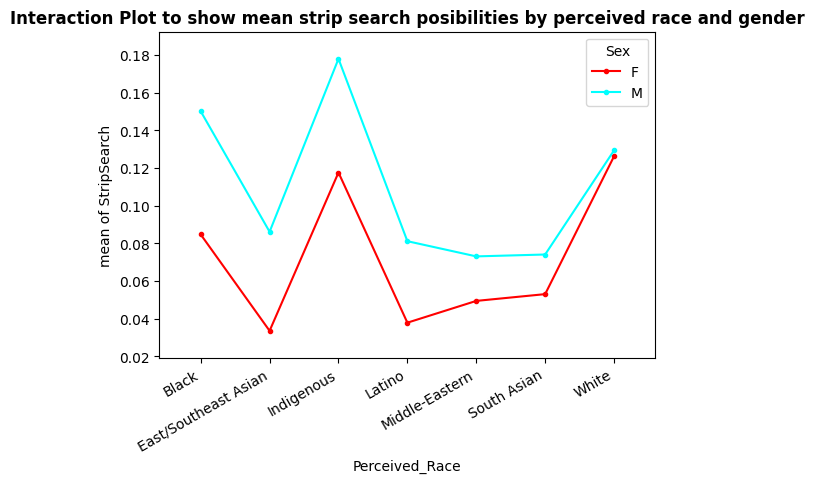

In [207]:
from statsmodels.graphics.factorplots import interaction_plot
#new_df['Age_group__at_arrest_'].sort.unique()
plt.figure(figsize=(15, 9))
rq_1_interaction = interaction_plot(x = new_df['Perceived_Race'], trace = new_df['Sex'], response = new_df['StripSearch']).autofmt_xdate()
plt.title('Interaction Plot to show mean strip search posibilities by perceived race and gender', fontweight='bold')

Text(0.5, 1.0, 'Interaction Plot to show mean strip search posibilities by perceived race and age group at arrest')

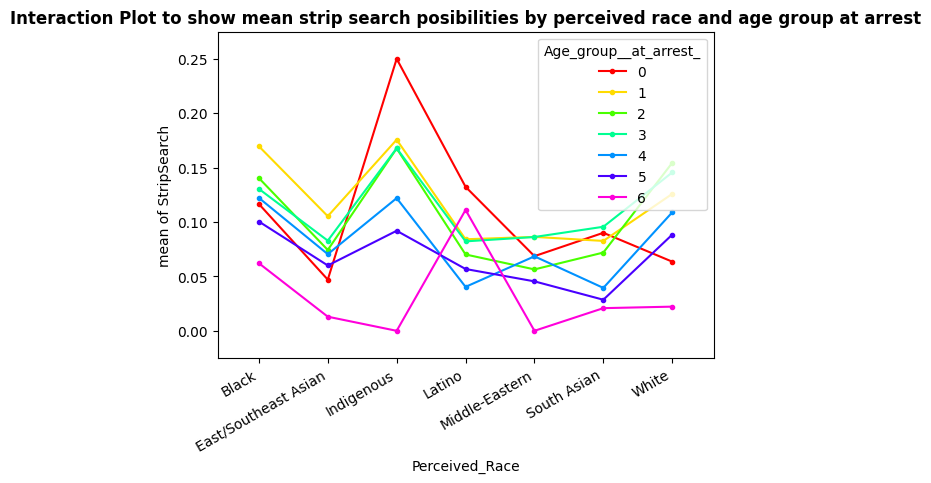

In [208]:

rq_2_interaction = interaction_plot(x = new_df['Perceived_Race'], trace = new_df['Age_group__at_arrest_'], response = new_df['StripSearch']).autofmt_xdate()
plt.title('Interaction Plot to show mean strip search posibilities by perceived race and age group at arrest', fontweight='bold')

In [209]:
items_found = new_df[['Sex','Perceived_Race','Age_group__at_arrest_', 'Booked','StripSearch']].copy()
items_found = items_found.dropna(subset=['StripSearch'])
items_found.head()

,Sex,Perceived_Race,Age_group__at_arrest_,Booked,StripSearch
0,M,White,3,1,0
1,M,White,3,1,0
3,M,Black,2,0,0
4,M,South Asian,2,1,0
5,M,South Asian,2,1,0


In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import statsmodels
pd.options.display.max_columns = None #show all columns in data
#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(sample1,sample2):
    #calculate the sample size
    n1, n2 = len(sample1), len(sample2)
    #calculate the variances
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

# function to calculate Cohen's d for independent samples
def Cohens_d(sample1, sample2):
    u1, u2 = np.mean(sample1), np.mean(sample2)
    s_pooled = pooled_standard_deviation(sample1, sample2)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

In [211]:
male = items_found[items_found['Booked']== 1]
female = items_found[items_found['Booked']== 0]

sea_b = male['StripSearch']
sea_b1 = female['StripSearch']
     

In [212]:
#conduct power analysis 
from statsmodels.stats.power import TTestIndPower
effect_size = Cohens_d(sea_b, sea_b1)
alpha = 0.05
power = 0.8
ratio_ = len(sea_b)/len(sea_b1) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for period 3 grades:',effect_size)

Effect size (Cohen's D) for period 3 grades: 0.6320324347139958


Example write up for above: Prior to computing a t-test to analyze whether a students’ final grade (outcome variable) differed between family sizes less than and greater than three (3) (two-level explanatory variable), we calculated the effect size of the explanatory variable using Cohen's D metric, which was 0.17.

In [213]:

#https://www.statsmodels.org/dev/generated/statsmodels.stats.power.TTestIndPower.solve_power.html
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for GT3_G3') 
print('Actual size of GT3_G3:', len(sea_b1))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for LE3_G3')
print('Actual size of LE3_G3:', len(sea_b))

Sample Size of nobs1: 38.520 needed for GT3_G3
Actual size of GT3_G3: 28720
Sample Size of nobs2: 42.204 needed for LE3_G3
Actual size of LE3_G3: 31467


Example write up: After obtaining the effect size, the required sample size was computed using the obtained effect size and establishing the statistical power at 80%. The results indicated that a sample size of 341 was required for family size less than three, while a sample size of 842 was required for family size greater than three. This is significant because the sample size provided in the dataset are 114 and 281 respectively, which impacts the reliability of the results.

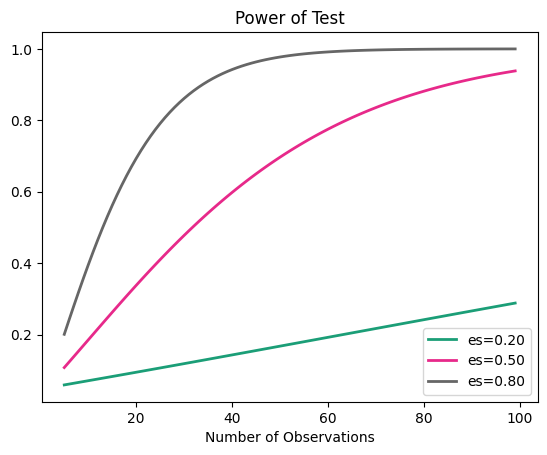

In [214]:

#lastly power curve

effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.array(range(5, 100))
  
# plot power curves
analysis.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()

In [215]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [216]:
from pingouin import ancova
pd.options.display.max_columns = None

In [217]:
items_found
anvoca_dataset = items_found[['StripSearch', 'Booked','Sex', 'Age_group__at_arrest_', 'Perceived_Race']].copy()

In [218]:
anvoca_dataset

,StripSearch,Booked,Sex,Age_group__at_arrest_,Perceived_Race
0,0,1,M,3,White
1,0,1,M,3,White
3,0,0,M,2,Black
4,0,1,M,2,South Asian
5,0,1,M,2,South Asian
...,...,...,...,...,...
65270,0,0,F,2,White
65271,0,0,F,2,Indigenous
65272,0,1,M,3,South Asian
65273,0,0,F,4,White


In [219]:
#anvoca_dataset['Sex'] = anvoca_dataset['Sex'].replace(['M'], 0)
#anvoca_dataset['Sex'] = anvoca_dataset['Sex'].replace(['F'], 1)

ancova(data=anvoca_dataset, dv='StripSearch', covar='Booked', between='Perceived_Race')

,Source,SS,DF,F,p-unc,np2
0,Perceived_Race,30.6938,6,53.2829,0.0000,0.0053
1,Booked,570.1156,1,5938.1389,0.0000,0.0898
2,Residual,5777.7335,60179,NaN,NaN,NaN


Statistical interpretation Interpretation p-unc = “uncorrected p-value” for Mjob is greater than 0.05. We cannot reject the null hypothesis that each of the mother job results in the same final grade, even after controlling for the student's first term (G1) grade in class.  Practical interpretation We hypothesized that the mother's socioeconomic status (a stable life) would be able to predict a student's final grade. From our results, we see that there is no statistically significant relationship between mother's job and student's final grade when controlling for their first term grade. This raises interesting insights. If we consider mother job category as a proxy for family socioeconomic status, the mother job categories present in the dataset may be too abstract to account for the relationship between a family's socioeconomic status and final grade. The job category of mother's job may not be influencing the student's final grade right now but it is still possible it influences student performance in university (further down the road).

In [220]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
pd.options.display.max_columns = None

In [221]:
#I select some random numerical features. Note, you will want to one hot encode non-numerical features 
x = items_found[['Sex','Perceived_Race','Age_group__at_arrest_', 'Booked']].copy()
# Select the response column 
y = items_found['StripSearch']
#y = pd.get_dummies(search_reasons['ItemsFound'], drop_first=True)

In [222]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60187 entries, 0 to 65275
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Sex                    60187 non-null  object
 1   Perceived_Race         60187 non-null  object
 2   Age_group__at_arrest_  60187 non-null  int64 
 3   Booked                 60187 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 4.3+ MB


In [223]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=123)

In [224]:
x_train

,Sex,Perceived_Race,Age_group__at_arrest_,Booked
59949,M,White,2,1
10852,M,White,3,1
2656,M,Middle-Eastern,5,1
51707,M,White,2,0
20968,F,White,2,0
...,...,...,...,...
59004,M,White,2,1
19002,M,White,5,1
30256,M,Middle-Eastern,2,1
16873,M,Black,4,1


In [225]:
y_train

59949    1
10852    0
2656     1
51707    0
20968    0
        ..
59004    0
19002    0
30256    0
16873    1
57249    0
Name: StripSearch, Length: 48149, dtype: int64

In [226]:
#building the model with statsmodels
import statsmodels.formula.api as smf

# Create the formula string 
all_columns = ' + '.join(x)
formula = "StripSearch ~ " + all_columns 
print("Formula: ", formula, "\n")

# Put the training predictors and responses into one DataFrame to be input into the model
trainingdata = pd.concat([x_train,y_train], axis = 1)

# Build the model
log_reg_1 = smf.logit(formula, data=trainingdata).fit()

Formula:  StripSearch ~ Sex + Perceived_Race + Age_group__at_arrest_ + Booked 

Optimization terminated successfully.
         Current function value: 0.311256
         Iterations 8


In [227]:
print(log_reg_1.summary())

                           Logit Regression Results                           
Dep. Variable:            StripSearch   No. Observations:                48149
Model:                          Logit   Df Residuals:                    48139
Method:                           MLE   Df Model:                            9
Date:                Mon, 17 Apr 2023   Pseudo R-squ.:                  0.1534
Time:                        03:22:11   Log-Likelihood:                -14987.
converged:                       True   LL-Null:                       -17701.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -3.7235      0.067    -55.811      0.000      -3.854      -3.593
Sex[T.M]                                   0.14

In [228]:
np.exp(log_reg_1.params)

Intercept                                 0.0241
Sex[T.M]                                  1.1510
Perceived_Race[T.East/Southeast Asian]    0.5863
Perceived_Race[T.Indigenous]              1.2681
Perceived_Race[T.Latino]                  0.5002
Perceived_Race[T.Middle-Eastern]          0.4666
Perceived_Race[T.South Asian]             0.5206
Perceived_Race[T.White]                   1.0565
Age_group__at_arrest_                     0.8933
Booked                                   14.2538
dtype: float64

In [229]:
params = log_reg_1.params
conf = log_reg_1.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
np.exp(conf)

,Lower CI,Upper CI,OR
Intercept,0.0212,0.0275,0.0241
Sex[T.M],1.0637,1.2454,1.1510
Perceived_Race[T.East/Southeast Asian],0.5104,0.6734,0.5863
Perceived_Race[T.Indigenous],1.0866,1.4798,1.2681
Perceived_Race[T.Latino],0.4064,0.6157,0.5002
Perceived_Race[T.Middle-Eastern],0.3947,0.5516,0.4666
Perceived_Race[T.South Asian],0.4458,0.6079,0.5206
Perceived_Race[T.White],0.9878,1.1299,1.0565
Age_group__at_arrest_,0.8722,0.9148,0.8933
Booked,12.8824,15.7712,14.2538


In [230]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Predict responses 
pred_1 = log_reg_1.predict(x_test)
# round() rounds to nearest integer;
# 0.5 rounds to 0; 0.501 rounds to 1
prediction_1 = list(map(round, pred_1))
     

# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction_1))


Test accuracy =  0.8779697624190065


In [231]:

cm = confusion_matrix(y_test, prediction_1) 
print ("\nConfusion Matrix : \n", cm) 


Confusion Matrix : 
 [[10569     0]
 [ 1469     0]]


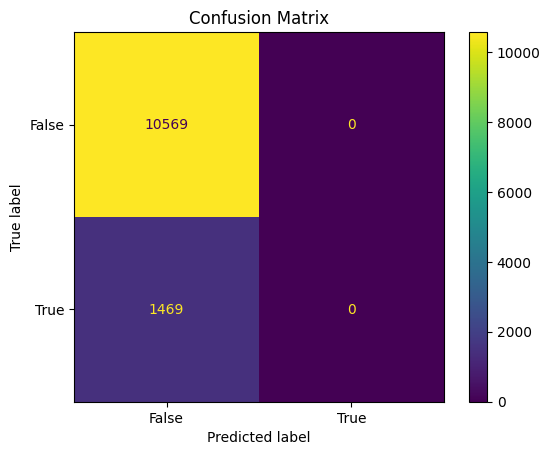

In [232]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Create the confusion matrix
y_true = [0] * 10569 + [1] * 1469
y_pred = [0] * 10569 + [0] * 1469
cm = confusion_matrix(y_true, y_pred)

# Create the ConfusionMatrixDisplay object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['False', 'True'])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [233]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import statsmodels.api as sm
pd.options.display.max_rows = 10

In [234]:
mod = sm.Logit.from_formula('StripSearch ~ Age_group__at_arrest_', items_found)
res = mod.fit()
me = res.get_margeff()

Optimization terminated successfully.
         Current function value: 0.367420
         Iterations 6


In [235]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            StripSearch   No. Observations:                60187
Model:                          Logit   Df Residuals:                    60185
Method:                           MLE   Df Model:                            1
Date:                Mon, 17 Apr 2023   Pseudo R-squ.:                0.002387
Time:                        03:22:20   Log-Likelihood:                -22114.
converged:                       True   LL-Null:                       -22167.
Covariance Type:            nonrobust   LLR p-value:                 8.122e-25
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.7404      0.027    -65.543      0.000      -1.792      -1.688
Age_group__at_arrest_    -0.0979      0.010    -10.214      0.000      -0.117      -0.079
=========================================================================================
"""

In [236]:
me.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:            StripSearch
Method:                          dydx
At:                           overall
=========================================================================================
                           dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Age_group__at_arrest_    -0.0104      0.001    -10.202      0.000      -0.012      -0.008
=========================================================================================
"""

In [237]:
from scipy import stats

Λ = lambda x: stats.logistic().cdf(x)
λ = lambda x: stats.logistic().pdf(x)

β_ = res.params.values.reshape(-1, 1)
V_ = res.cov_params().values

In [238]:
# this is the equation from above for Var(F)
# only works for a single observation though
def var_π(x, β, V_):
    #      λ(z)**s * x.T @ V_ @ x
    prob = λ(x.T.dot(β))**2 * x.T.dot(V_).dot(x)  # maybe this is it?
    return prob
# for multiple observations, but not quite vectorized fully

def var_πs(xx, β, V_):
    α = λ(xx.dot(β))**2
    out = np.empty((500, 1))
    for i, x in enumerate(xx):
        out[i] = x.T.dot(V_).dot(x)
    return α * out

In [239]:
# Making some fake data.
xx = sm.add_constant(np.linspace(items_found.Age_group__at_arrest_.min(), items_found.Age_group__at_arrest_.max(), 500).reshape(-1, 1))
πs = Λ(xx.dot(β_))
vv = np.sqrt(var_πs(xx, β_, V_))

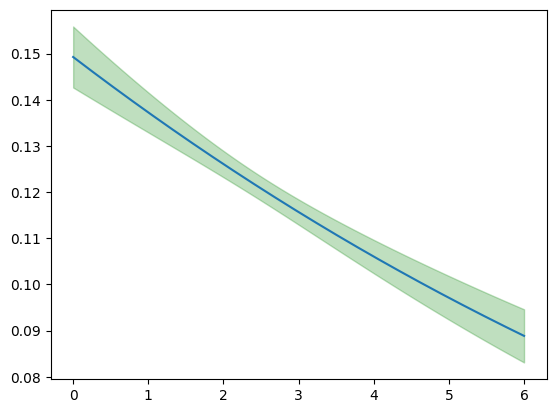

In [240]:
plt.plot(xx[:, 1], πs)
plt.fill_between(xx[:, 1], (πs - 1.96*vv).ravel(), (πs + 1.96*vv).ravel(),
                 alpha=.25, color='g')